## Exploratory Data Analysis on Booking Behavior data of customers for British Airways

We will explore the customer data first to get to know it better in depth.


In [29]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#get current working directory

cwd = os.getcwd()

#read the csv

df = pd.read_csv(cwd + "/customer_booking.csv",  encoding="ISO-8859-1")

In [31]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [32]:
df.shape

(50000, 14)

In [33]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### Sales info

In [35]:
# number of bookings done on the various mediums
print('Number of bookings made across various media:\n ',df.sales_channel.value_counts()) 

Number of bookings made across various media:
  sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64


In [36]:
# number of bookings done on the internet
internet_booking = df.sales_channel.value_counts().values[0]
# percentage of internet bookings
internet_booking_percentage = internet_booking  / df.sales_channel.count() *100
# number of mobile bookings
mobile_booking = df.sales_channel.value_counts().values[1]
# percentage of mobile bookings
mobile_booking_percentage = mobile_booking  / df.sales_channel.count() *100

print(f'Percentage of internet bookings: {round(internet_booking_percentage,2)}%')
print(f'Percentage of mobile bookings: {round(mobile_booking_percentage,2)}%')

Percentage of internet bookings: 88.76%
Percentage of mobile bookings: 11.24%


### Trip Type

In [37]:
# identify the number of each type of trip
print('Number of trips for the various trip types: \n', df.trip_type.value_counts())

Number of trips for the various trip types: 
 trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64


In [38]:
# percentage of the various types of trip
round_trip = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
oneway_trip = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
circle_trip = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print(f"Percentage of round trips: {round_trip} %")
print(f"Percentage of oneway trips: {oneway_trip} %")
print(f"Percentage of circle trips: {circle_trip} %")


Percentage of round trips: 98.994 %
Percentage of oneway trips: 0.774 %
Percentage of circle trips: 0.232 %


### Purchase Lead

C:\Users\JusticePC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JusticePC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


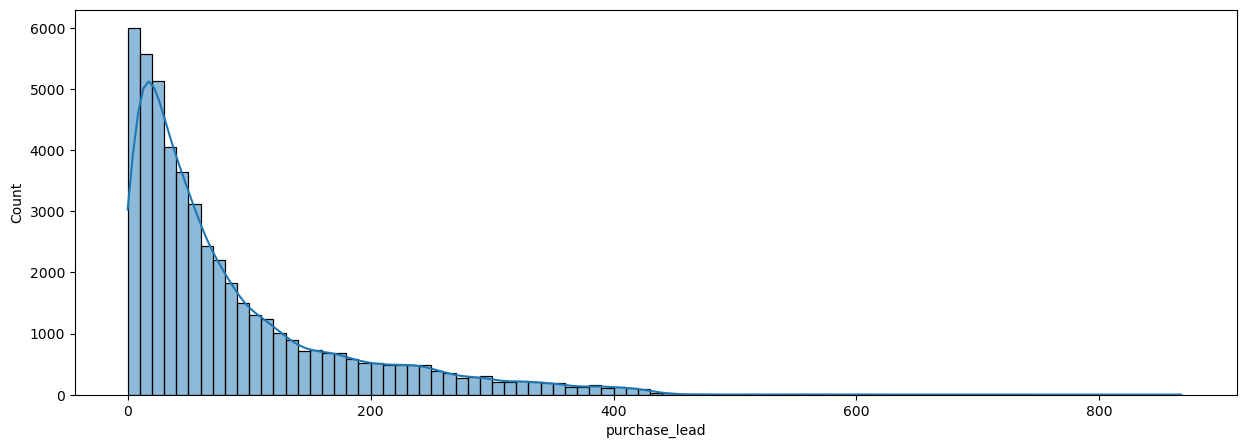

In [40]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='purchase_lead', binwidth=10,kde=True);
plt.show()

Some bookings were made more than 2 years before the travel date, which seems highly unusual. However, it's possible that this occurred due to cancellations and rebookings within a 6-month period, potentially resulting in double-counting. Typically, airlines allow tickets to be rebooked within a year. For now, we will treat these cases as outliers, as they could significantly impact the results of our predictive model.

In [45]:
# number of bookings beyond 1 and half years
(df.purchase_lead >550).value_counts()

purchase_lead
False    49986
True        14
Name: count, dtype: int64

In [46]:
# percentage of outliers
print(f'Percentage of outliers: {(df.purchase_lead >550).value_counts().values[1]/len(df.purchase_lead)}%')

Percentage of outliers: 0.00028%


Given that the percentage of outliers is negligible, we can safely assume that customers do not typically book more than 1.5 years in advance. Consequently, we will proceed by removing all entries with a 'purchase_lead' exceeding 550 days.

In [50]:
# create a dataframe with purchase_lead less than or equal to 550 days
df = df[df.purchase_lead <= 550]
df.shape

(49986, 14)

### Length Of Stay

C:\Users\JusticePC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\JusticePC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

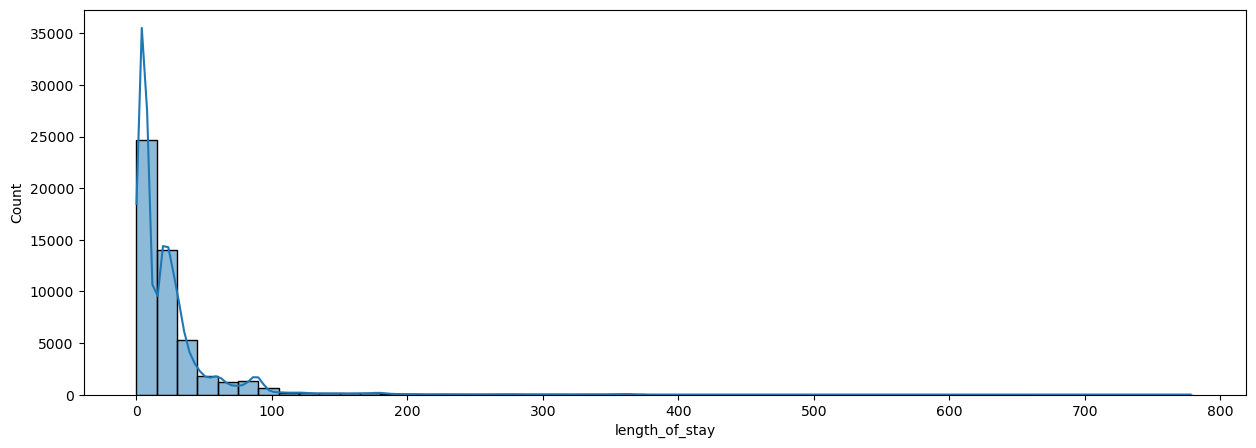

In [51]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

Let's determine the number of entries in our dataset where the length of stay exceeds 550 days (~1.5years).

In [55]:
(df.length_of_stay> 550).value_counts()

length_of_stay
False    49980
True         6
Name: count, dtype: int64

In [56]:
df[df.length_of_stay> 550].booking_complete.value_counts()

booking_complete
0    5
1    1
Name: count, dtype: int64

We are going to stick to dataset with 550 or less length of stay days.

In [58]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.length_of_stay <=550 ]
df.shape

(49980, 14)

### Flight Day

We will map the flight day with a number of a week. 

In [59]:
# numerate days starting with sunday as day 1
numerate_days = {
    "Sun" : 1,
    "Mon" : 2,
    "Tue" : 3,
    "Wed" : 4,
    "Thu" : 5,
    "Fri" : 6,
    "Sat" : 7
}

df.flight_day = df.flight_day.map(numerate_days)

In [60]:
df.flight_day.value_counts()

flight_day
2    8098
3    7672
4    7671
5    7421
6    6759
1    6551
7    5808
Name: count, dtype: int64

Monday was the most preferred day of flight for customers whereas Saturday turned out to be the least. It would be interesting to figure out how many of these bookings were completed.

In [76]:
# total number of complete booking in our dataset
df[df["flight_day"]<=7].booking_complete.value_counts()

booking_complete
0    42505
1     7475
Name: count, dtype: int64

In [78]:
# count the number of complete booking on each day
def count_complete_bookings_by_day(df, day_range):
    
    # Initialize an empty DataFrame to store the results
    result_df = pd.DataFrame()

    # Iterate through each day in the day_range
    for day in day_range:
        # Filter the DataFrame for bookings on the current day
        day_data = df[df["flight_day"] == day]
        
        # Calculate the count of complete bookings and add it to the result DataFrame
        day_count = day_data["booking_complete"].value_counts()
        result_df[f'Day_{day}_Complete'] = day_count

    return result_df

day_range = range(1, 8)  # Days 1 to 7
result_df = count_complete_bookings_by_day(df, day_range)
print(result_df)


                  Day_1_Complete  Day_2_Complete  Day_3_Complete  \
booking_complete                                                   
0                           5625            6895            6543   
1                            926            1203            1129   

                  Day_4_Complete  Day_5_Complete  Day_6_Complete  \
booking_complete                                                   
0                           6420            6299            5776   
1                           1251            1122             983   

                  Day_7_Complete  
booking_complete                  
0                           4947  
1                            861  


It can be observed that Wednesday had a lot of complete bookings. That is to say that most customers like to travel on midweek.

### Booking Origin

Text(0, 0.5, 'Number of Booking Applications')

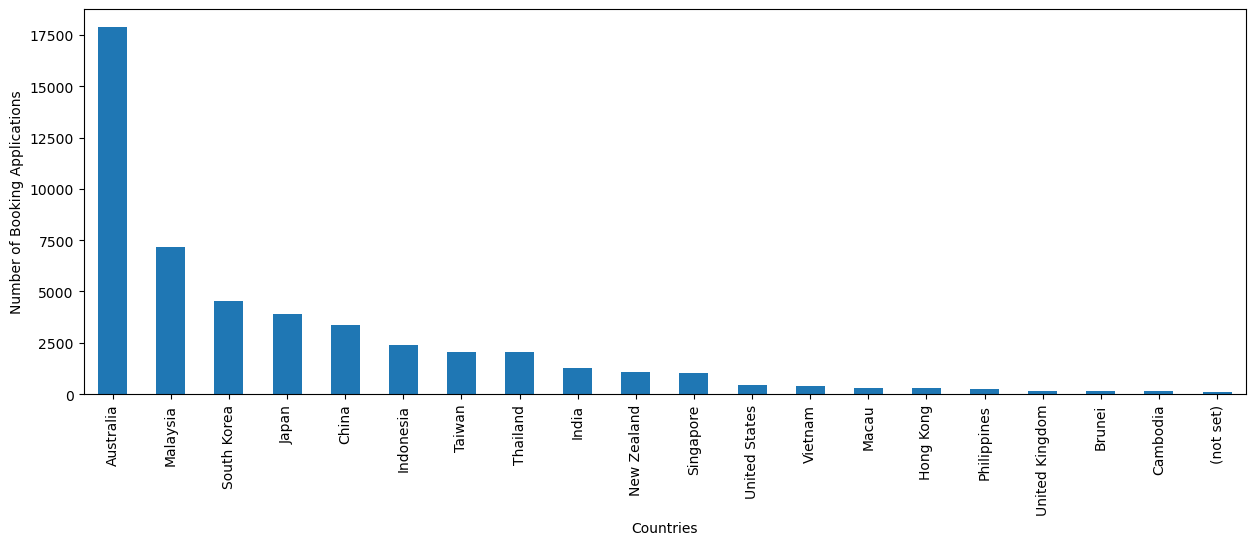

In [79]:
# identify the country with the most booking applications
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of Booking Applications")

It can be observed that a lot of the booking applications came from Australia followed by Malaysia whiles Cambodia records the least. We would like to investigate the number of complete bookings that came from these countries.

Text(0, 0.5, 'Number of complete bookings')

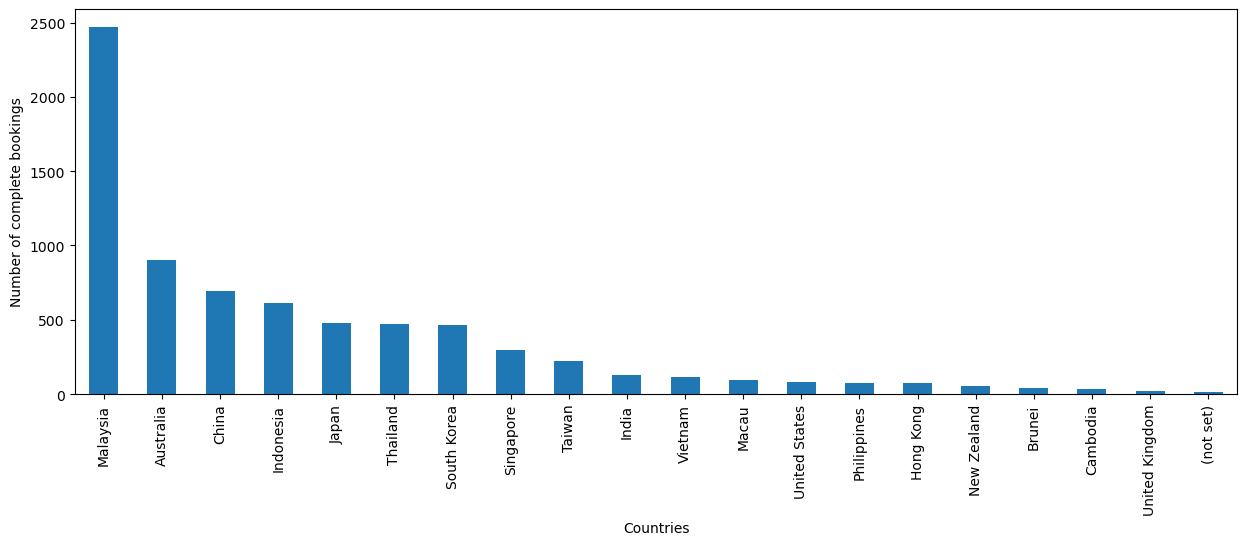

In [75]:
# identify the country with the most complete bookings
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

Malaysia turned out to be the country with the most complete bookings followed by Australia whiles the United Kingdom had the least complete bookings. 

### Booking complete

In [82]:
# find the complete booking percentage
complete_booking_percentage = df.booking_complete.value_counts().values[1] / len(df) * 100
print(f"Out of {len(df)} booking entries only {round(unsuccessful_booking_per,2)} % bookings were completed.")

Out of 49980 booking entries only 14.96 % bookings were completed.


## Export the dataset to csv



In [83]:
df.to_csv(cwd + "/explored_customer_booking.csv")